In [62]:
#to library the packages
library(readr)
library(MASS)
library(ggplot2)
library(SPREDA)
library(nlme)
library(dplyr)
library(psych)
library(kableExtra)
library(knitr)
library(kableExtra)
library(RColorBrewer)
library(stargazer)
library(jtools)
library(gridExtra)
library(reshape2)
options(scipen=999)

ERROR: ignored

In [16]:
#To import the data and change the variable types

library(readr)
supermkt <- read_csv("supermkt.csv")
View(supermkt)
glimpse(supermkt)

Rows: 50 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): State
dbl (4): Advertisement Spend, Promotion Spend, Administration Spend, Profit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
826745.10,136897.80,471784.10,New York,640870.28
650390.80,151377.59,443898.53,California,767168.24
230162.27,101145.55,407934.54,Florida,286575.59
481240.14,118671.85,383199.62,New York,914505.49
213161.01,91391.77,366168.42,Florida,249281.91
65938.45,99814.71,362861.36,New York,390247.78
538461.84,147198.87,127716.82,California,712245.02
195447.20,145530.06,323876.68,Florida,233628.90
2009030.42,148718.95,311613.29,New York,1520211.77


Rows: 50
Columns: 5
$ `Advertisement Spend`  <dbl> 826745.10, 650390.80, 230162.27, 481240.14, 213…
$ `Promotion Spend`      <dbl> 136897.80, 151377.59, 101145.55, 118671.85, 913…
$ `Administration Spend` <dbl> 471784.1, 443898.5, 407934.5, 383199.6, 366168.…
$ State                  <chr> "New York", "California", "Florida", "New York"…
$ Profit                 <dbl> 640870.3, 767168.2, 286575.6, 914505.5, 249281.…


In [12]:
#Check variable forms
is.numeric(supermkt$`Advertisement Spend`)
is.numeric(supermkt$`Promotion Spend`)
is.numeric(supermkt$`Administration Spend`)
is.numeric(supermkt$Profit)
colnames(supermkt) <- c("AdSpend", "PromotionSpend", "AdminSpend", "State", "Profit")


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [17]:
#Descriptive Statistics 

head(supermkt)
stat <- summary(supermkt, omit = T)
as.data.frame(stat)
stat %>%
  kbl(caption = "Table 1: Descriptive Statistics") %>%
  kable_classic(full_width = F, html_font = "Cambria")

Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
826745.10,136897.80,471784.1,New York,640870.3
650390.80,151377.59,443898.5,California,767168.2
230162.27,101145.55,407934.5,Florida,286575.6
481240.14,118671.85,383199.6,New York,914505.5
213161.01,91391.77,366168.4,Florida,249281.9
65938.45,99814.71,362861.4,New York,390247.8


Var1,Var2,Freq
<fct>,<fct>,<chr>
,Advertisement Spend,Min. : 0
,Advertisement Spend,1st Qu.: 99633
,Advertisement Spend,Median : 190576
,Advertisement Spend,Mean : 380232
,Advertisement Spend,3rd Qu.: 490315
,Advertisement Spend,Max. :3155230
,Promotion Spend,Min. : 51283
,Promotion Spend,1st Qu.:103731
,Promotion Spend,Median :122700


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 1: Descriptive Statistics</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:left;"> Advertisement Spend </th>
   <th style="text-align:left;"> Promotion Spend </th>
   <th style="text-align:left;"> Administration Spend </th>
   <th style="text-align:left;">    State </th>
   <th style="text-align:left;">     Profit </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> Min.   :      0 </td>
   <td style="text-align:left;"> Min.   : 51283 </td>
   <td style="text-align:left;"> Min.   :     0 </td>
   <td style="text-align:left;"> Length:50 </td>
   <td style="text-align:left;"> Min.   :  49363 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> 1st Qu.:  99633 </td>
   <td style="text-align:left;"> 1st Qu.:1

<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 1: Descriptive Statistics</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:left;"> Advertisement Spend </th>
   <th style="text-align:left;"> Promotion Spend </th>
   <th style="text-align:left;"> Administration Spend </th>
   <th style="text-align:left;">    State </th>
   <th style="text-align:left;">     Profit </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> Min.   :      0 </td>
   <td style="text-align:left;"> Min.   : 51283 </td>
   <td style="text-align:left;"> Min.   :     0 </td>
   <td style="text-align:left;"> Length:50 </td>
   <td style="text-align:left;"> Min.   :  49363 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> 1st Qu.:  99633 </td>
   <td style="text-align:left;"> 1st Qu.:103731 </td>
   <td style="text-align:left;"> 1st Qu.:129300 </td>
   <td style="text-align:left;"> Class :character </td>
   <td style="text-align:left;"> 1st Qu.: 202273 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> Median : 190576 </td>
   <td style="text-align:left;"> Median :122700 </td>
   <td style="text-align:left;"> Median :212716 </td>
   <td style="text-align:left;"> Mode  :character </td>
   <td style="text-align:left;"> Median : 366662 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> Mean   : 380232 </td>
   <td style="text-align:left;"> Mean   :121345 </td>
   <td style="text-align:left;"> Mean   :211025 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:left;"> Mean   : 491507 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> 3rd Qu.: 490315 </td>
   <td style="text-align:left;"> 3rd Qu.:144842 </td>
   <td style="text-align:left;"> 3rd Qu.:299469 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:left;"> 3rd Qu.: 706874 </td>
  </tr>
  <tr>
   <td style="text-align:left;">  </td>
   <td style="text-align:left;"> Max.   :3155230 </td>
   <td style="text-align:left;"> Max.   :182646 </td>
   <td style="text-align:left;"> Max.   :471784 </td>
   <td style="text-align:left;"> NA </td>
   <td style="text-align:left;"> Max.   :1520212 </td>
  </tr>
</tbody>
</table>


In [18]:
#Correlation Table
cor<-cor(supermkt[,c(1,2,3,5)])

round(cor,3) %>%
  kbl(caption = "Table 2: Correlation Chart of Ad, Promotion, Admin and Profit") %>%
  kable_classic(full_width = F, html_font = "Cambria")

<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 2: Correlation Chart of Ad, Promotion, Admin and Profit</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Advertisement Spend </th>
   <th style="text-align:right;"> Promotion Spend </th>
   <th style="text-align:right;"> Administration Spend </th>
   <th style="text-align:right;"> Profit </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Advertisement Spend </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> 0.289 </td>
   <td style="text-align:right;"> 0.245 </td>
   <td style="text-align:right;"> 0.743 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Promotion Spend </td>
   <td style="text-align:right;"> 0.289 </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> -0.032 </td>
   <td style="text-align:

<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 2: Correlation Chart of Ad, Promotion, Admin and Profit</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Advertisement Spend </th>
   <th style="text-align:right;"> Promotion Spend </th>
   <th style="text-align:right;"> Administration Spend </th>
   <th style="text-align:right;"> Profit </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Advertisement Spend </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> 0.289 </td>
   <td style="text-align:right;"> 0.245 </td>
   <td style="text-align:right;"> 0.743 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Promotion Spend </td>
   <td style="text-align:right;"> 0.289 </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> -0.032 </td>
   <td style="text-align:right;"> 0.149 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Administration Spend </td>
   <td style="text-align:right;"> 0.245 </td>
   <td style="text-align:right;"> -0.032 </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> 0.185 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Profit </td>
   <td style="text-align:right;"> 0.743 </td>
   <td style="text-align:right;"> 0.149 </td>
   <td style="text-align:right;"> 0.185 </td>
   <td style="text-align:right;"> 1.000 </td>
  </tr>
</tbody>
</table>

Var1,Var2,value
<fct>,<fct>,<dbl>
Advertisement Spend,Advertisement Spend,1.00000000
Promotion Spend,Advertisement Spend,0.28929716
Administration Spend,Advertisement Spend,0.24548256
Profit,Advertisement Spend,0.74295262
Advertisement Spend,Promotion Spend,0.28929716
Promotion Spend,Promotion Spend,1.00000000
Administration Spend,Promotion Spend,-0.03215388
Profit,Promotion Spend,0.14871603
Advertisement Spend,Administration Spend,0.24548256


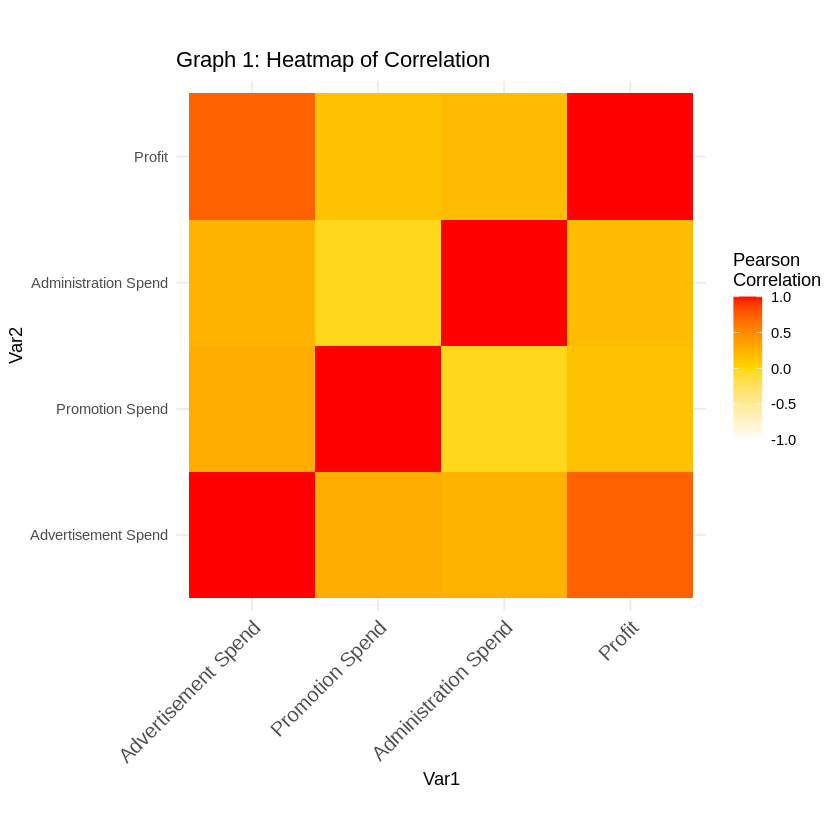

In [24]:
#Create Heatmap
melted <- melt(cor)
melted
ggplot(data = melted, aes(x=Var1, y=Var2, fill = value)) +
  geom_tile()+
  scale_fill_gradient2(low = "white", high = "red", mid = "gold", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") + theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1))+
  coord_fixed() + labs(title = "Graph 1: Heatmap of Correlation")

In [32]:
#Change Column Names

colnames(supermkt) <- c("AdSpend", "PromotionSpend", "AdminSpend", "State", "Profit")
glimpse(supermkt)

Rows: 50
Columns: 5
$ AdSpend        <dbl> 826745.10, 650390.80, 230162.27, 481240.14, 213161.01, …
$ PromotionSpend <dbl> 136897.80, 151377.59, 101145.55, 118671.85, 91391.77, 9…
$ AdminSpend     <dbl> 471784.1, 443898.5, 407934.5, 383199.6, 366168.4, 36286…
$ State          <chr> "New York", "California", "Florida", "New York", "Flori…
$ Profit         <dbl> 640870.3, 767168.2, 286575.6, 914505.5, 249281.9, 39024…


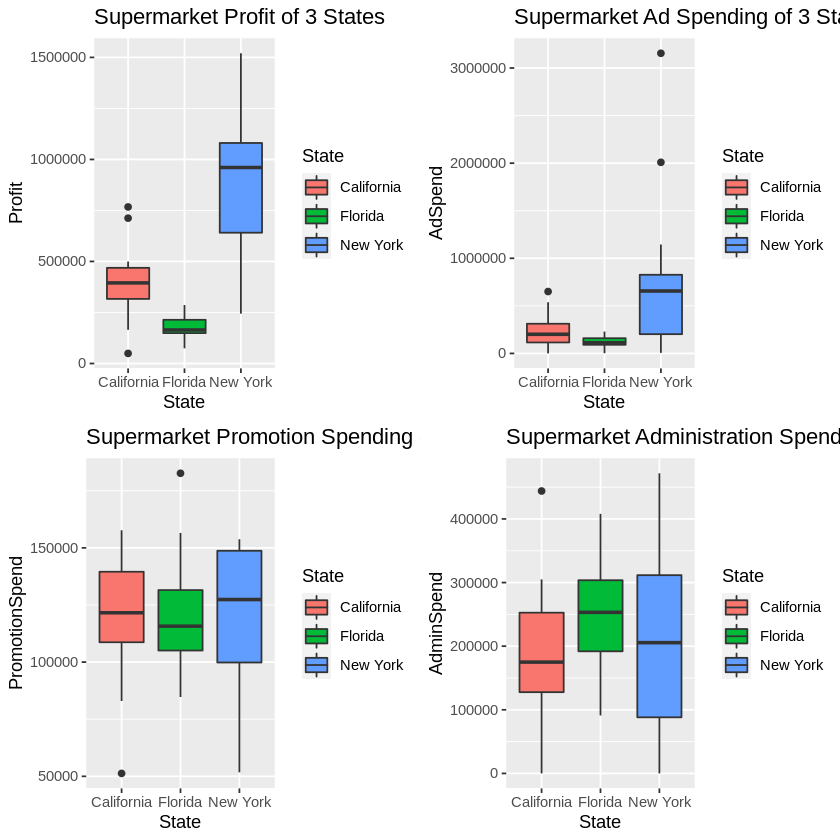

In [33]:
#Create Boxplot

box1 <- ggplot(supermkt, mapping = aes(x = Profit, y = State, fill = State)) + geom_boxplot( )+ coord_flip() + labs(title = "Supermarket Profit of 3 States")
box2 <- ggplot(supermkt, mapping = aes(x = AdSpend, y = State, fill = State)) + geom_boxplot( )+ coord_flip() + labs(title = "Supermarket Ad Spending of 3 States")
box3 <- ggplot(supermkt, mapping = aes(x = PromotionSpend, y = State, fill = State)) + geom_boxplot( )+ coord_flip() + labs(title = "Supermarket Promotion Spending of 3 States")
box4 <- ggplot(supermkt, mapping = aes(x = AdminSpend, y = State, fill = State)) + geom_boxplot( )+ coord_flip() + labs(title = "Supermarket Administration Spending of 3 States")
grid.arrange(box1 , box2 , box3 , box4, ncol=2, nrow=2)

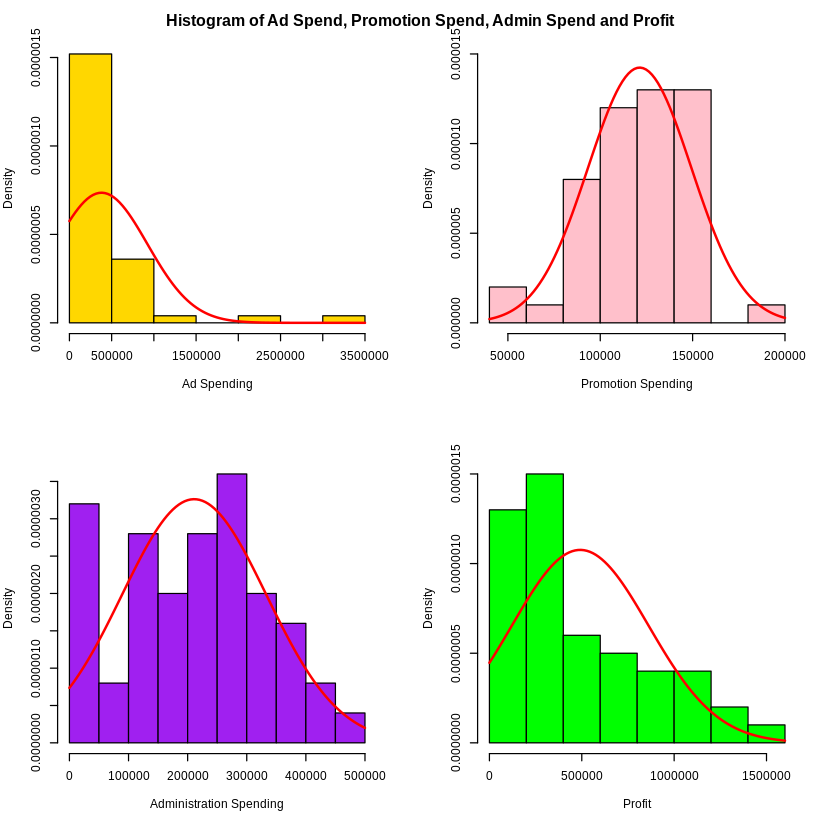

In [34]:
#Normality Check

par(mfrow = c(2, 2), mai = c(0.2,0.8,0.5,0.8), cex = 0.6, mar = c(6,4,3,3))
hist(supermkt$AdSpend, xlab = "Ad Spending", freq = F, col = "gold", main = "")
curve(dnorm(x, mean= mean(supermkt$AdSpend), sd = sd(supermkt$AdSpend)), col = "red", lwd =2, add = TRUE)

hist(supermkt$PromotionSpend , xlab = "Promotion Spending", freq = F, col = "pink", ylim = c(0, 0.000015), main = "")
curve(dnorm(x, mean= mean(supermkt$PromotionSpend), sd = sd(supermkt$PromotionSpend)), col = "red", lwd =2, add = TRUE)
hist(supermkt$AdminSpend, xlab = "Administration Spending", freq = F, col = "purple", main = "")
curve(dnorm(x, mean= mean(supermkt$AdminSpend), sd = sd(supermkt$AdminSpend)), col = "red", lwd =2, add = TRUE)
hist(supermkt$Profit, xlab = "Profit", freq = F, col = "green", main = "")
curve(dnorm(x, mean= mean(supermkt$Profit), sd = sd(supermkt$Profit)), col = "red", lwd =2, add = TRUE)
mtext("Histogram of Ad Spend, Promotion Spend, Admin Spend and Profit", side = 3, line = -2, outer = TRUE, cex = 0.8, font = 2)


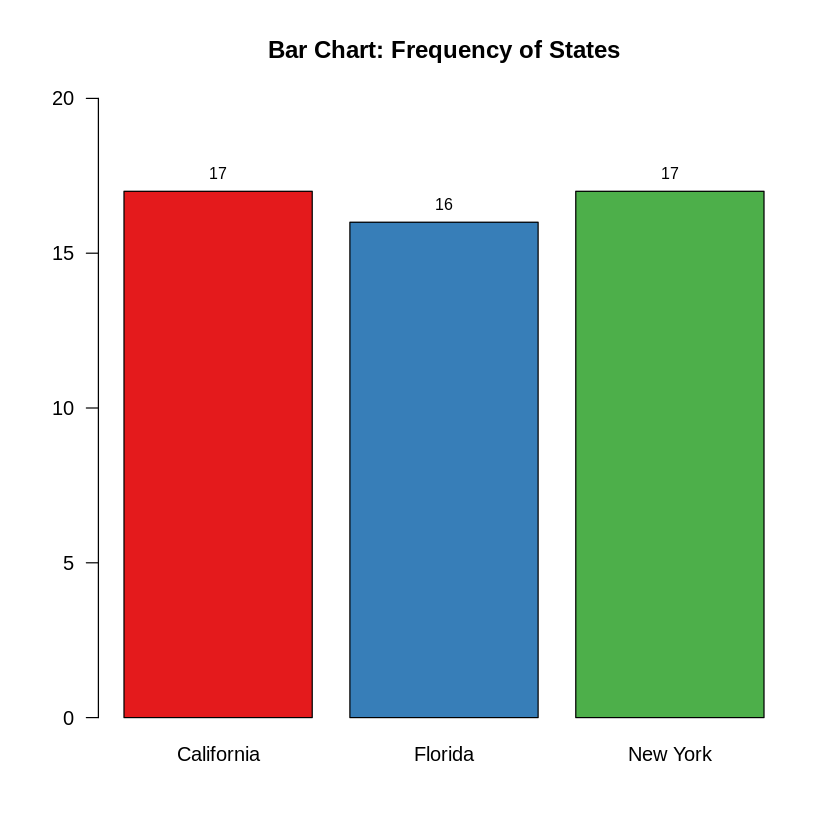

In [44]:
#bar chart of states frequency

table <- table(supermkt$State)
bar <- barplot(table, ylim = c(0,20), col = brewer.pal(3, "Set1"), las =1, main = "Bar Chart: Frequency of States")
text(y = table, bar, table, cex=0.8, pos=3)


In [45]:
#Creating Dummy Variables
cal <- ifelse(supermkt$State == "California", 1,0)
fl <- ifelse(supermkt$State == "Florida", 1, 0)
df_reg <- data.frame(AdSpend = supermkt$AdSpend,
                     PromotionSpend = supermkt$PromotionSpend,
                     AdminSpend = supermkt$AdminSpend,
                     Profit = supermkt$Profit,
                     California = cal,
                     Florida = fl)

In [46]:
#Regression Model
model <- lm(Profit ~ AdSpend + PromotionSpend + AdminSpend + California + Florida, data = df_reg)
summary(model)
confint.lm(model)


Call:
lm(formula = Profit ~ AdSpend + PromotionSpend + AdminSpend + 
    California + Florida, data = df_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-575953  -32241    8241   60752  284699 

Coefficients:
                    Estimate    Std. Error t value      Pr(>|t|)    
(Intercept)     504442.36820  123298.98817   4.091      0.000180 ***
AdSpend              0.25649       0.06011   4.267      0.000104 ***
PromotionSpend       0.61236       0.93832   0.653      0.517404    
AdminSpend           0.50786       0.22052   2.303      0.026064 *  
California     -333931.89006   65474.86477  -5.100 0.00000692160 ***
Florida        -557510.88773   73292.32902  -7.607 0.00000000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170800 on 44 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.7877 
F-statistic: 37.36 on 5 and 44 DF,  p-value: 0.00000000000000911


,2.5 %,97.5 %
(Intercept),255949.58547974,752935.1509295
AdSpend,0.13534632,0.3776426
PromotionSpend,-1.27870786,2.5034241
AdminSpend,0.06343338,0.9522846
California,-465887.80946275,-201975.9706473
Florida,-705221.87109627,-409799.9043737


In [47]:
#Modified Regression Model
model1 <- lm(Profit ~ AdSpend + California + Florida, data = df_reg)
summary(model1)
confint.lm(model1)


Call:
lm(formula = Profit ~ AdSpend + California + Florida, data = df_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-666548  -27497    2201   95174  292225 

Coefficients:
                 Estimate    Std. Error t value           Pr(>|t|)    
(Intercept)  640137.49548   59607.90163  10.739 0.0000000000000401 ***
AdSpend           0.31309       0.05442   5.753 0.0000006787398407 ***
California  -316800.11894   66869.63011  -4.738 0.0000210856878277 ***
Florida     -499886.72990   70765.66592  -7.064 0.0000000073064098 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 176900 on 46 degrees of freedom
Multiple R-squared:  0.7861,	Adjusted R-squared:  0.7721 
F-statistic: 56.34 on 3 and 46 DF,  p-value: 0.000000000000001935


,2.5 %,97.5 %
(Intercept),520153.0126216,760121.9783320
AdSpend,0.2035364,0.4226345
California,-451401.7030963,-182198.5347881
Florida,-642330.6273765,-357442.8324143


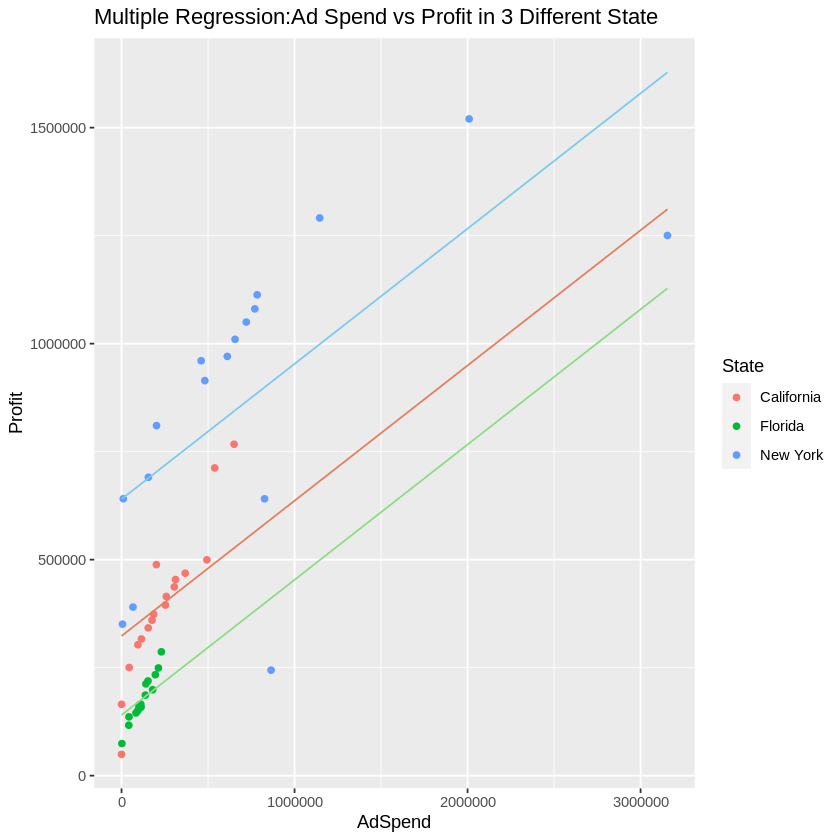

In [48]:
#Visualize 
#Multiple Regression
equany <- function(x){coef(model1)[2]*x + coef(model1)[1]}
equaca <- function(x){coef(model1)[2]*x + coef(model1)[1] + coef(model1)[3]}
equafl <- function(x){coef(model1)[2]*x + coef(model1)[1] + coef(model1)[4]}

ggplot(supermkt, aes(y = Profit, x = AdSpend, col = State)) + geom_point() +
  stat_function(fun = equany, geom = "line", color="#78CBEF") + 
  stat_function(fun = equaca, geom = "line", color="#E57D5C") +
  stat_function(fun = equafl, geom = "line", color="#8BDC84")+ labs(title = "Multiple Regression:Ad Spend vs Profit in 3 Different State ")

In [52]:
#SubGroup Analysis
nysub <- subset(supermkt, State == "New York")
clsub <- subset(supermkt, State == "California")
flsub <- subset(supermkt, State == "Florida")


In [55]:
nylm <- lm(nysub$Profit ~ nysub$AdSpend)
summary(nylm)
cllm <- lm(clsub$Profit ~ clsub$AdSpend)
summary(cllm)

fllm <- lm(flsub$Profit ~ flsub$AdSpend)
summary(fllm)


Call:
lm(formula = nysub$Profit ~ nysub$AdSpend)

Residuals:
    Min      1Q  Median      3Q     Max 
-662981 -255827  114134  182790  305427 

Coefficients:
                  Estimate   Std. Error t value   Pr(>|t|)    
(Intercept)   666204.11247  95792.23417   6.955 0.00000462 ***
nysub$AdSpend      0.27880      0.08881   3.139    0.00675 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 280200 on 15 degrees of freedom
Multiple R-squared:  0.3965,	Adjusted R-squared:  0.3563 
F-statistic: 9.855 on 1 and 15 DF,  p-value: 0.006753



Call:
lm(formula = clsub$Profit ~ clsub$AdSpend)

Residuals:
    Min      1Q  Median      3Q     Max 
-136910  -16035   12182   25343  126188 

Coefficients:
                  Estimate   Std. Error t value     Pr(>|t|)    
(Intercept)   186272.46062  25455.68396   7.318 0.0000025362 ***
clsub$AdSpend      0.87442      0.08383  10.430 0.0000000286 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62390 on 15 degrees of freedom
Multiple R-squared:  0.8788,	Adjusted R-squared:  0.8708 
F-statistic: 108.8 on 1 and 15 DF,  p-value: 0.00000002862



Call:
lm(formula = flsub$Profit ~ flsub$AdSpend)

Residuals:
   Min     1Q Median     3Q    Max 
-27106  -5353  -4096   6037  21416 

Coefficients:
                 Estimate  Std. Error t value       Pr(>|t|)    
(Intercept)   79675.09815  7388.17617   10.78 0.000000036386 ***
flsub$AdSpend     0.81336     0.05437   14.96 0.000000000527 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13410 on 14 degrees of freedom
Multiple R-squared:  0.9411,	Adjusted R-squared:  0.9369 
F-statistic: 223.8 on 1 and 14 DF,  p-value: 0.0000000005273


In [56]:
#Subgroup Analysis Visualization
reg <- ggplot(supermkt, mapping = aes(x=AdSpend, y = Profit, color = State)) + geom_point() + geom_smooth(method = 'lm') +labs(x="Ad Spend", y = "Profit", title = "Subgroup Analysis: Ad Spend vs Profit in 3 Different State")

`geom_smooth()` using formula 'y ~ x'



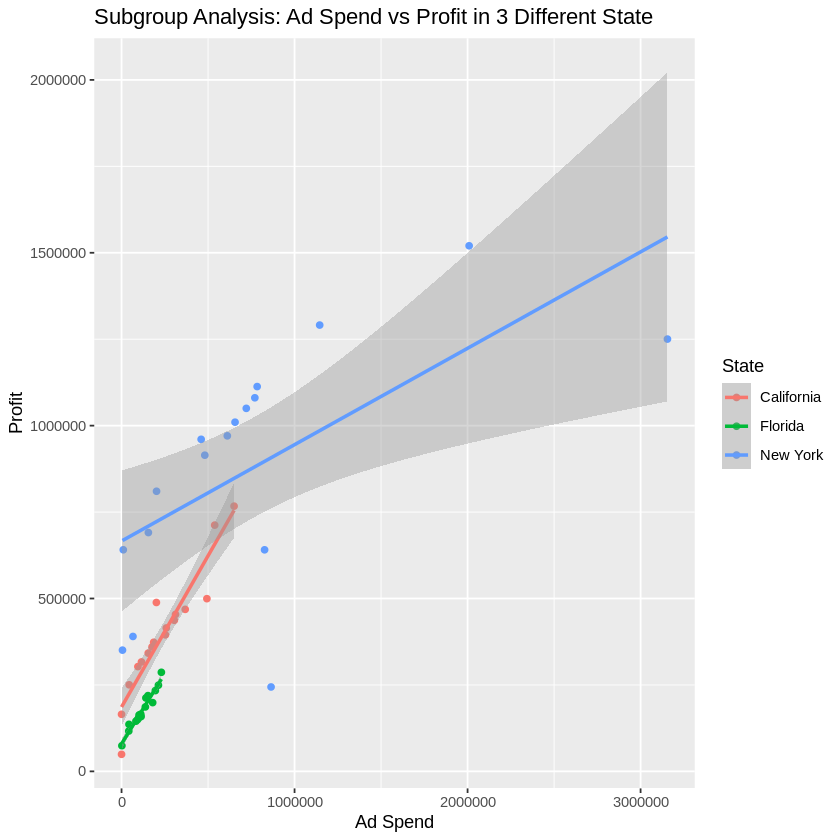

In [63]:
reg